In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler


In [4]:
def find_inertia(k, centroids, data):
    sse_error = 0
    for i in range(len(data)):
        min_val = np.inf
        for j in range(k):
            temp = (data[i][0]-centroids[j][0])**2 + \
                (data[i][1]-centroids[j][1])**2
            min_val = min(min_val, temp)
        sse_error = sse_error + min_val
    return sse_error


In [5]:
data = pd.read_csv('dataset3.csv')
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Annual Income and Spending Score

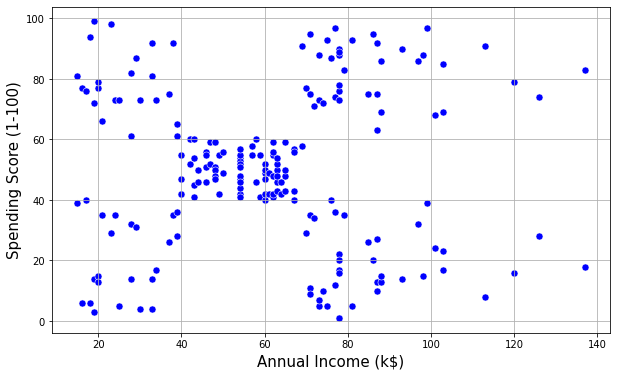

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Annual Income (k$)'],
                y=data['Spending Score (1-100)'], color='b', s=50)
plt.xlabel('Annual Income (k$)', fontsize=15)
plt.ylabel('Spending Score (1-100)', fontsize=15)
plt.grid()


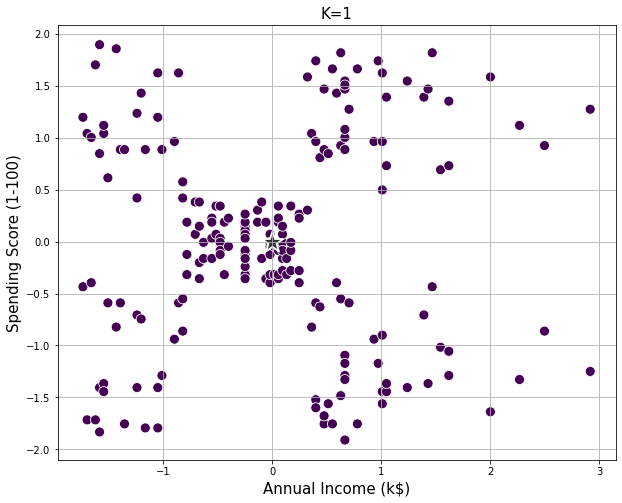

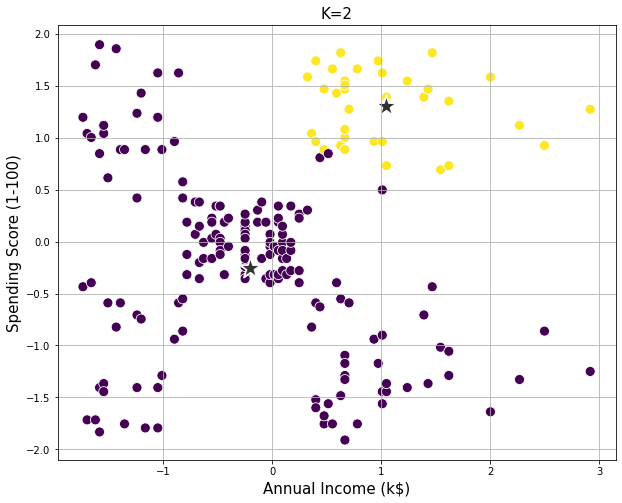

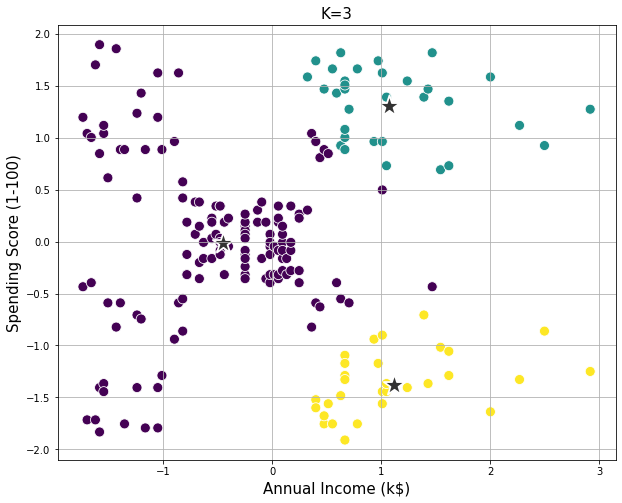

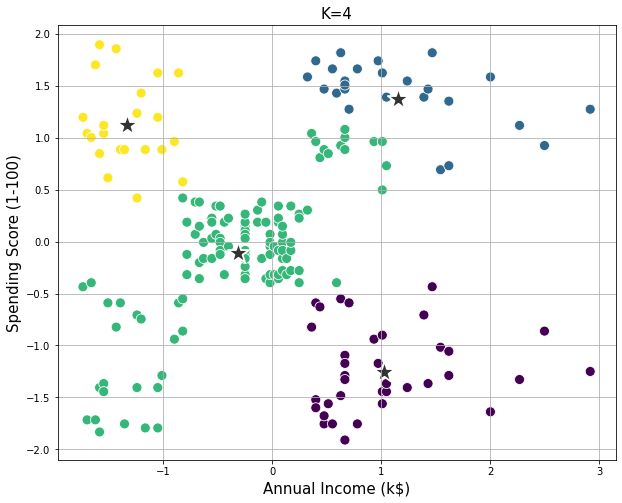

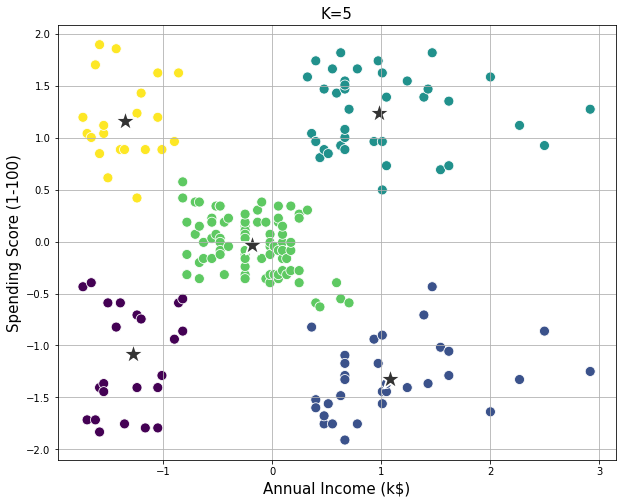

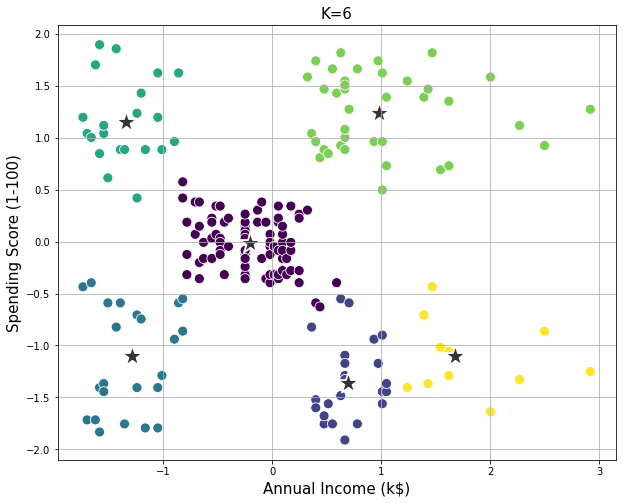

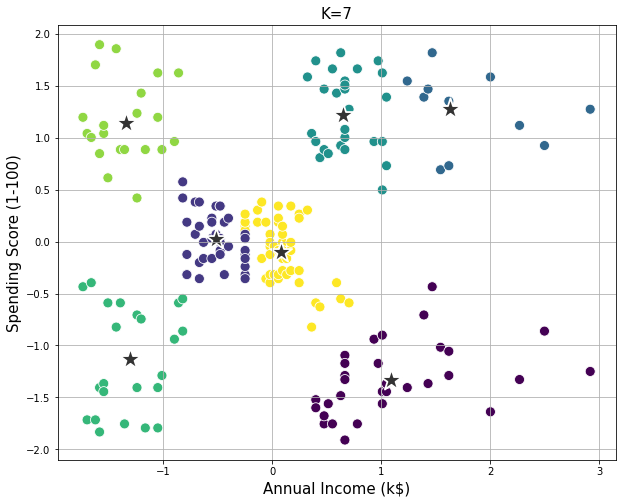

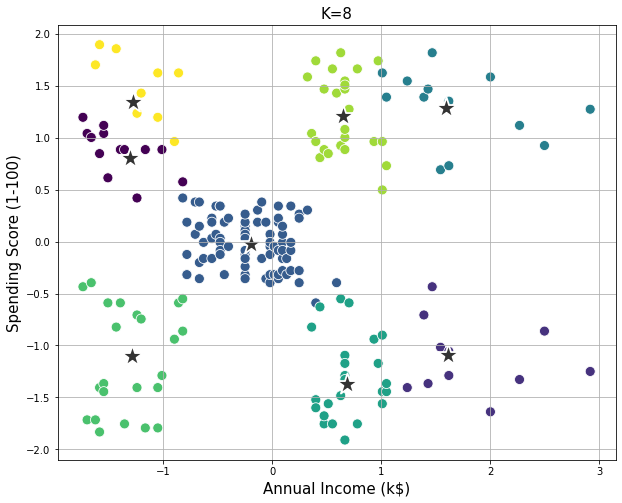

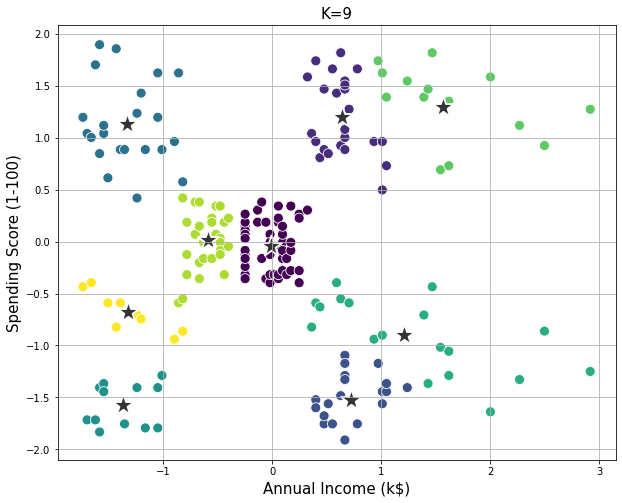

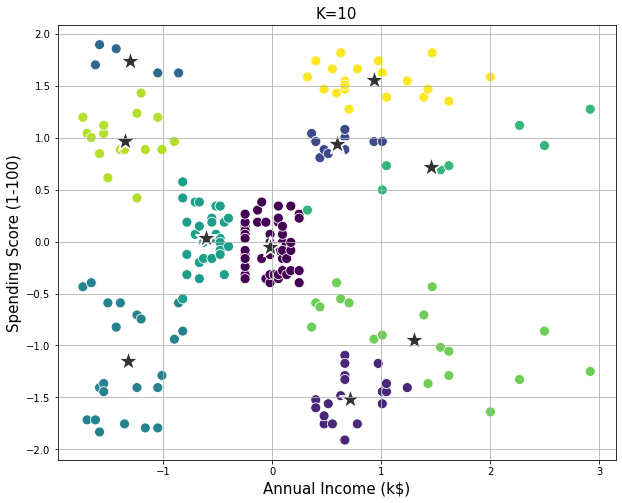

In [7]:
df = []
df.append(data['Annual Income (k$)'])
df.append(data['Spending Score (1-100)'])
df = np.array(df).transpose()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

k_set = [int(i) for i in range(1, 11)]

for k in k_set:
    gm = GaussianMixture(n_components=k).fit(df_scaled)
    y_pred = gm.predict(df_scaled)

    plt.figure(figsize=[10, 8])
    sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], c=y_pred, s=100)
    centers = gm.means_
    sns.scatterplot(x=centers[:, 0], y=centers[:, 1],
                    color='.2', marker='*', s=500)
    plt.grid()
    plt.title('K='+str(k), fontsize=15)
    plt.xlabel('Annual Income (k$)', fontsize=15)
    plt.ylabel('Spending Score (1-100)', fontsize=15)
    plt.show()


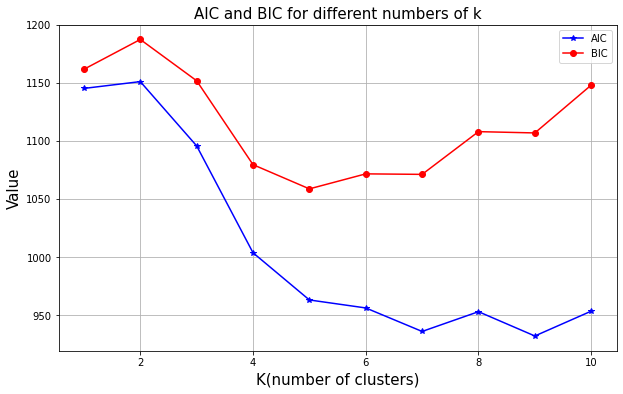

In [8]:
sum_bic = []
sum_aic = []

k_set = range(1, 11)
for k in k_set:
    gm = GaussianMixture(n_components=k).fit(df_scaled)
    sum_bic.append(gm.bic(df_scaled))
    sum_aic.append(gm.aic(df_scaled))

x_axis = np.arange(1, 11)
plt.figure(figsize=[10, 6])
plt.plot(x_axis, sum_aic, 'b-*', label='AIC')
plt.plot(x_axis, sum_bic, 'r-o', label='BIC')
plt.grid()
plt.title('AIC and BIC for different numbers of k', fontsize=15)
plt.xlabel('K(number of clusters)', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.legend(loc='upper right')
plt.show()


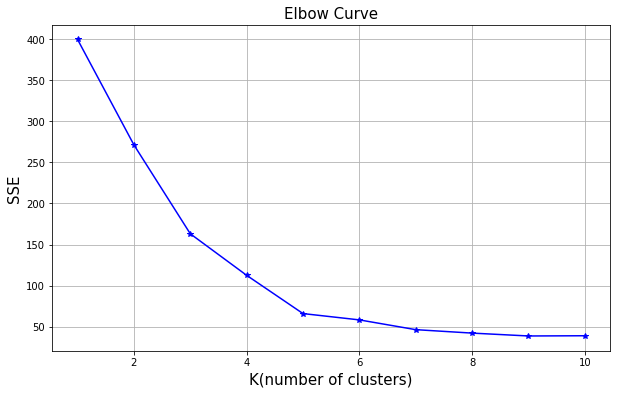

In [10]:
sse = []

k_set = range(1, 11)
for k in k_set:
    gm = GaussianMixture(n_components=k).fit(df_scaled)
    centers = gm.means_
    sse.append(find_inertia(k, centers, df_scaled))

x_axis = np.arange(1, 11)
plt.figure(figsize=[10, 6])
plt.plot(x_axis, sse, 'b-*')
plt.grid()
plt.title('Elbow Curve', fontsize=15)
plt.xlabel('K(number of clusters)', fontsize=15)
plt.ylabel('SSE', fontsize=15)
plt.show()


Therefore, there area five clusters in which the income and spending score (and hence the spending habits) can be divided. 

# Age and Spending

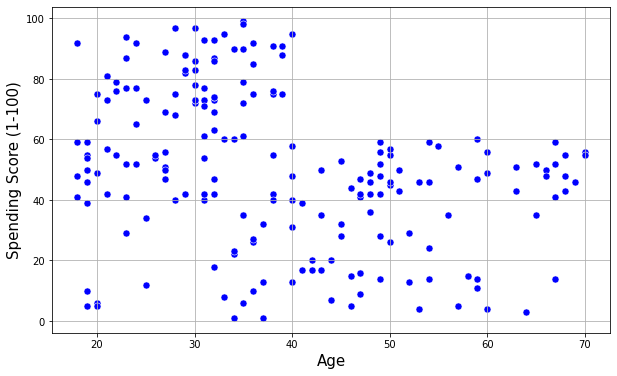

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data['Age'], y=data['Spending Score (1-100)'], color='b', s=50)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Spending Score (1-100)', fontsize=15)
plt.grid()


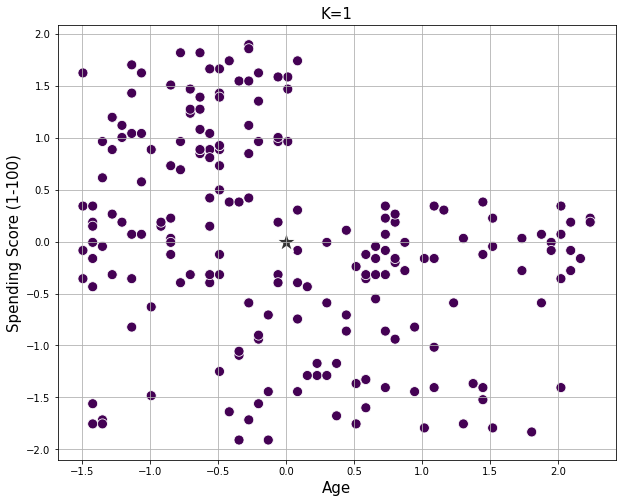

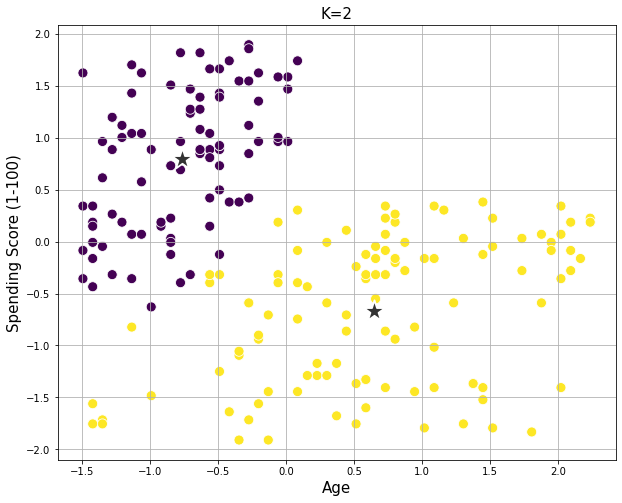

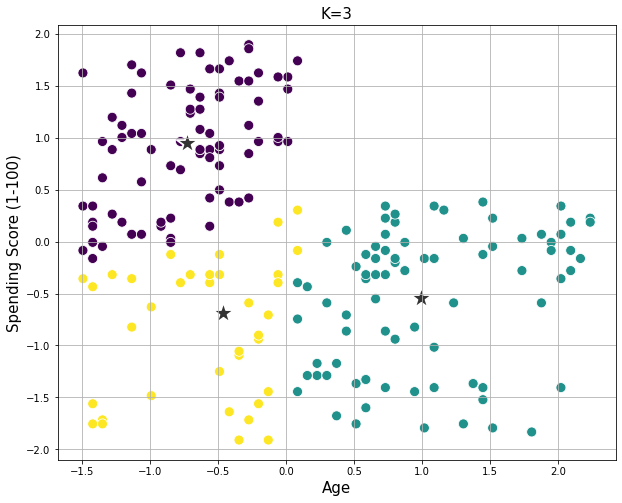

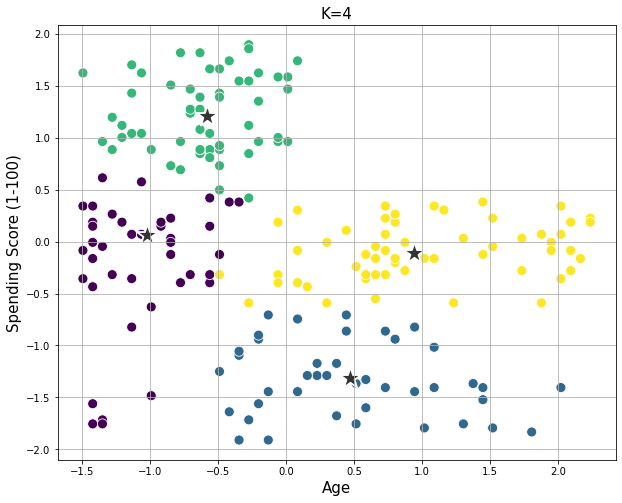

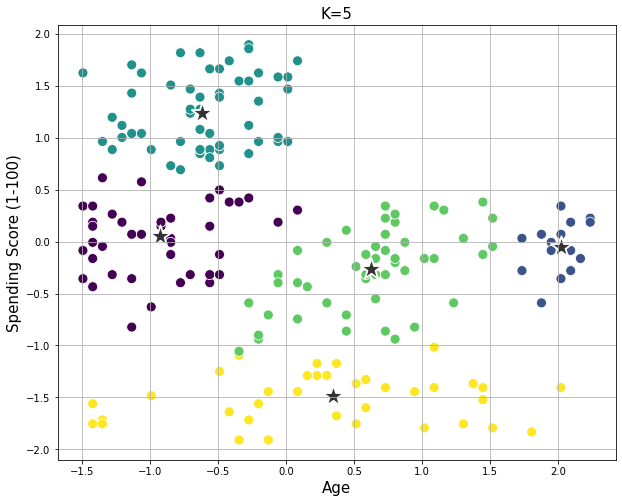

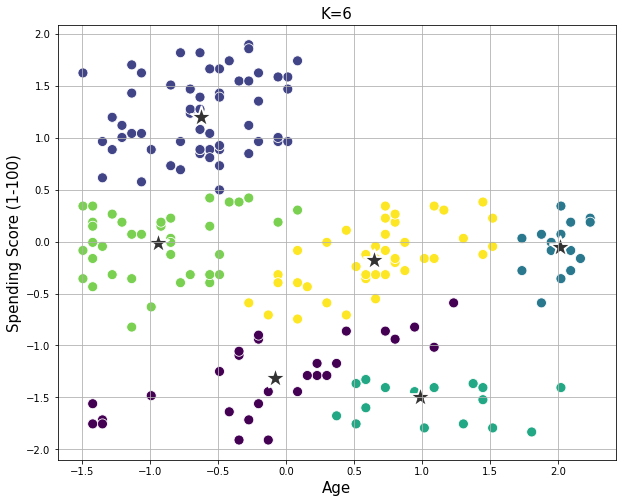

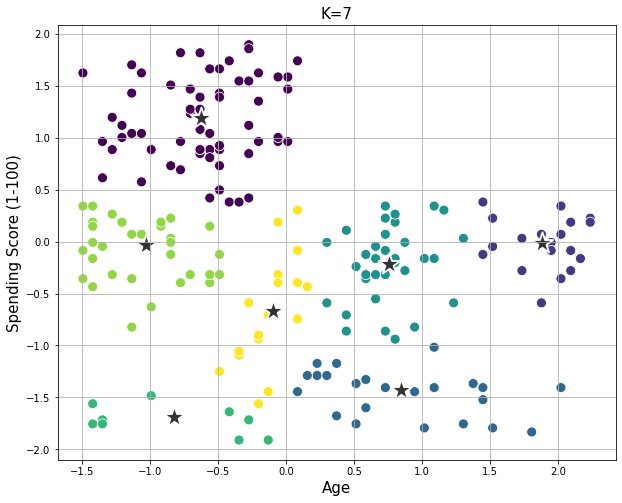

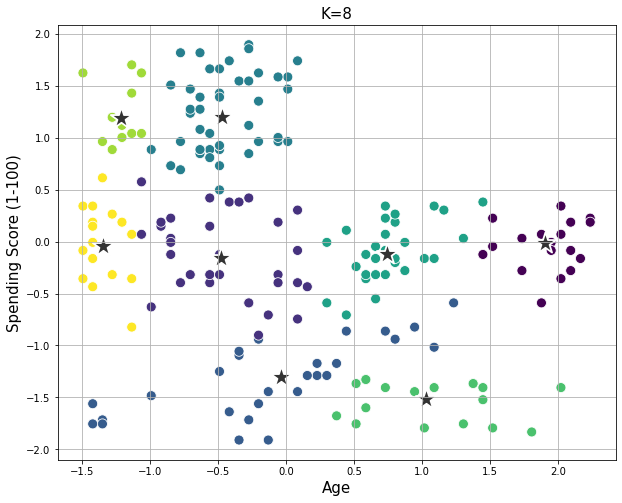

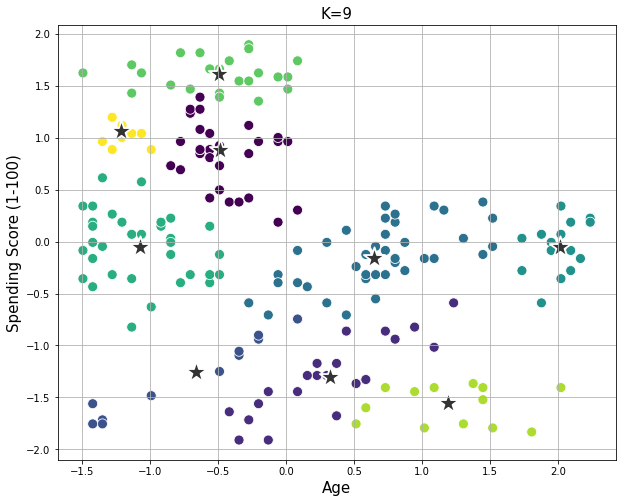

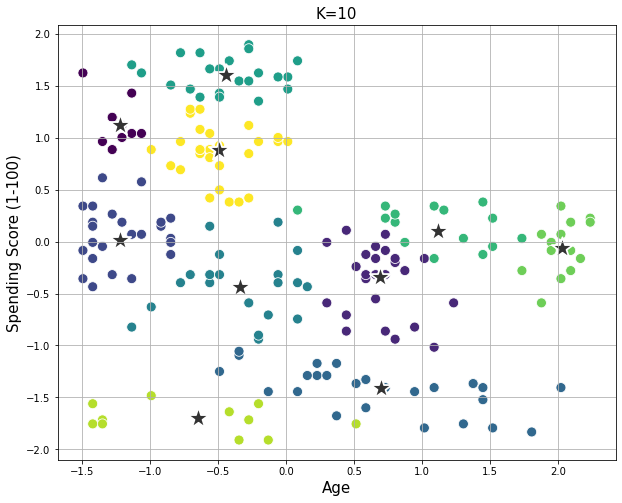

In [12]:
df = []
df.append(data['Age'])
df.append(data['Spending Score (1-100)'])
df = np.array(df).transpose()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

k_set = [int(i) for i in range(1, 11)]

for k in k_set:
    gm = GaussianMixture(n_components=k).fit(df_scaled)
    y_pred = gm.predict(df_scaled)

    plt.figure(figsize=[10, 8])
    sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], c=y_pred, s=100)
    centers = gm.means_
    sns.scatterplot(x=centers[:, 0], y=centers[:, 1],
                    color='.2', marker='*', s=500)
    plt.grid()
    plt.title('K='+str(k), fontsize=15)
    plt.xlabel('Age', fontsize=15)
    plt.ylabel('Spending Score (1-100)', fontsize=15)
    plt.show()


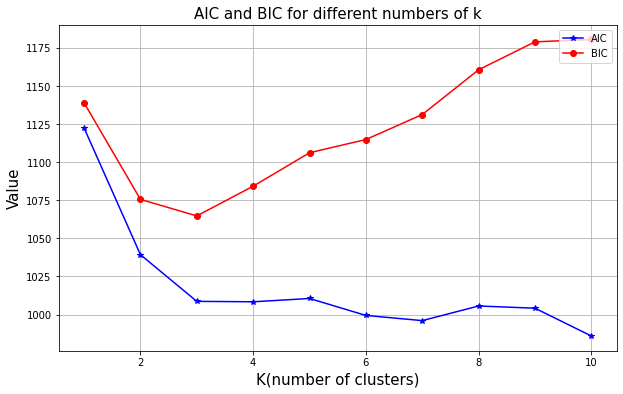

In [13]:
sum_bic = []
sum_aic = []

k_set = range(1, 11)
for k in k_set:
    gm = GaussianMixture(n_components=k).fit(df_scaled)
    sum_bic.append(gm.bic(df_scaled))
    sum_aic.append(gm.aic(df_scaled))

x_axis = np.arange(1, 11)
plt.figure(figsize=[10, 6])
plt.plot(x_axis, sum_aic, 'b-*', label='AIC')
plt.plot(x_axis, sum_bic, 'r-o', label='BIC')
plt.grid()
plt.title('AIC and BIC for different numbers of k', fontsize=15)
plt.xlabel('K(number of clusters)', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.legend(loc='upper right')
plt.show()


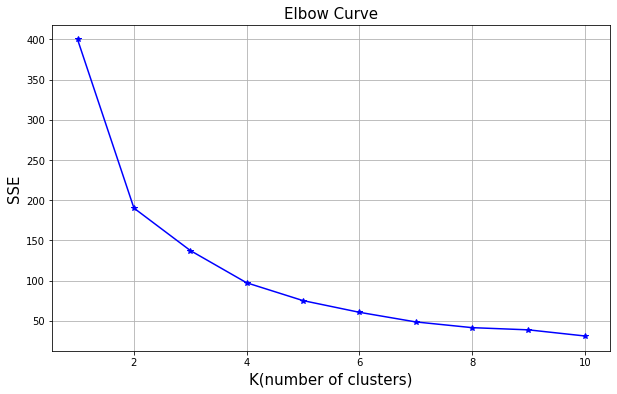

In [14]:
sse = []

k_set = range(1, 11)
for k in k_set:
    gm = GaussianMixture(n_components=k).fit(df_scaled)
    centers = gm.means_
    sse.append(find_inertia(k, centers, df_scaled))

x_axis = np.arange(1, 11)
plt.figure(figsize=[10, 6])
plt.plot(x_axis, sse, 'b-*')
plt.grid()
plt.title('Elbow Curve', fontsize=15)
plt.xlabel('K(number of clusters)', fontsize=15)
plt.ylabel('SSE', fontsize=15)
plt.show()


4 clusters

# Age and Annual Income

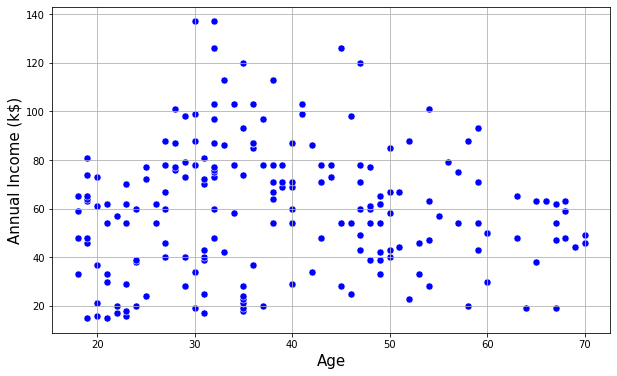

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Age'], y=data['Annual Income (k$)'], color='b', s=50)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Annual Income (k$)', fontsize=15)
plt.grid()


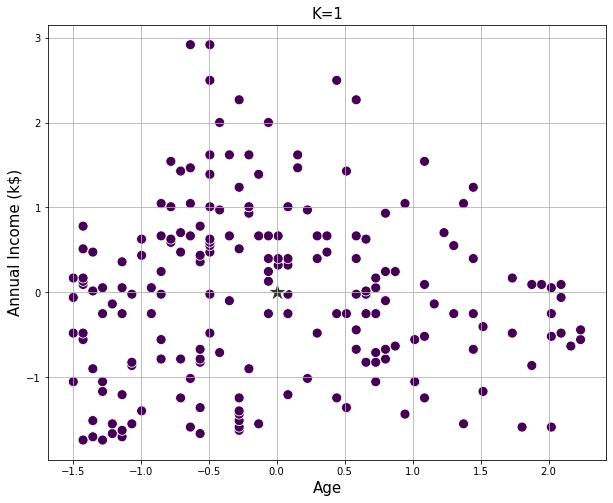

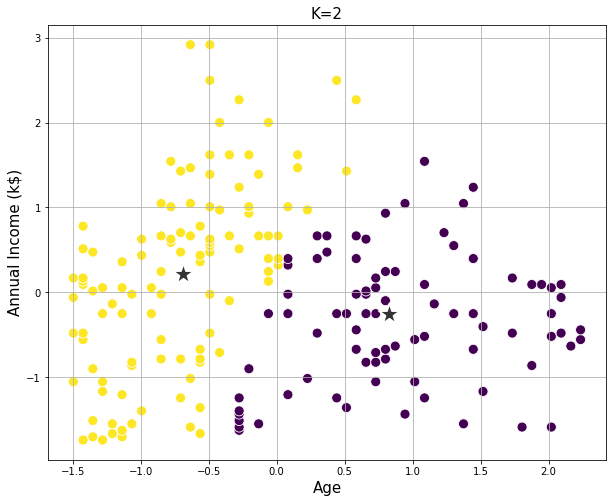

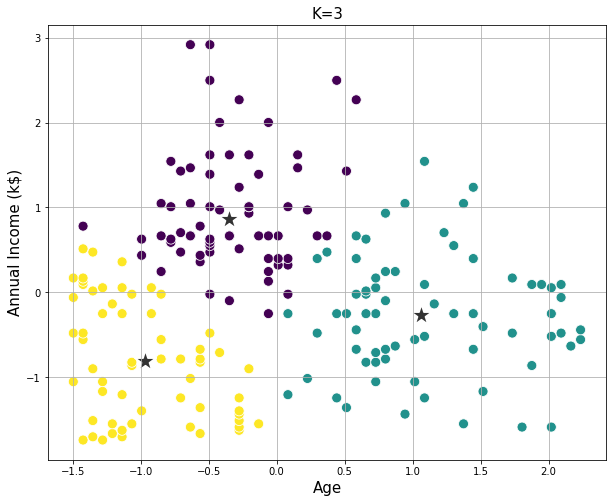

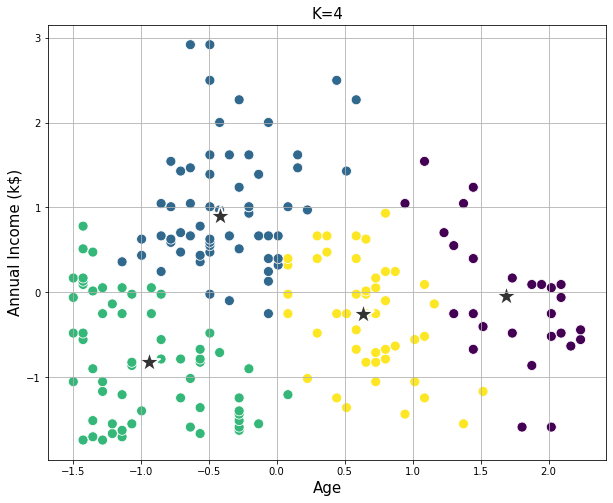

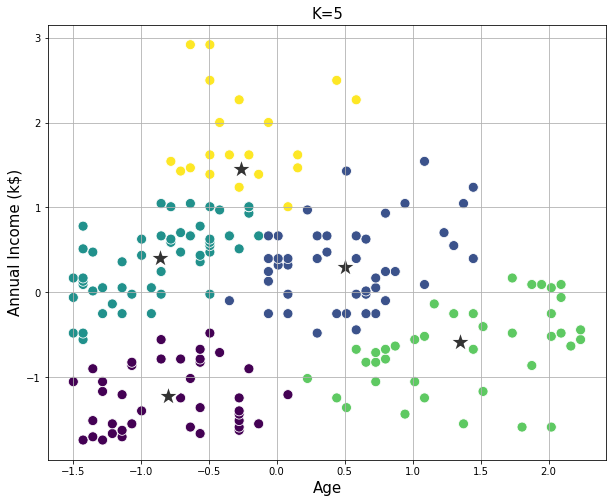

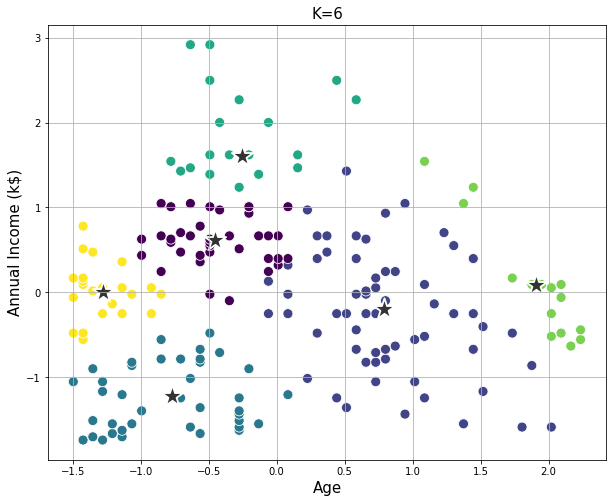

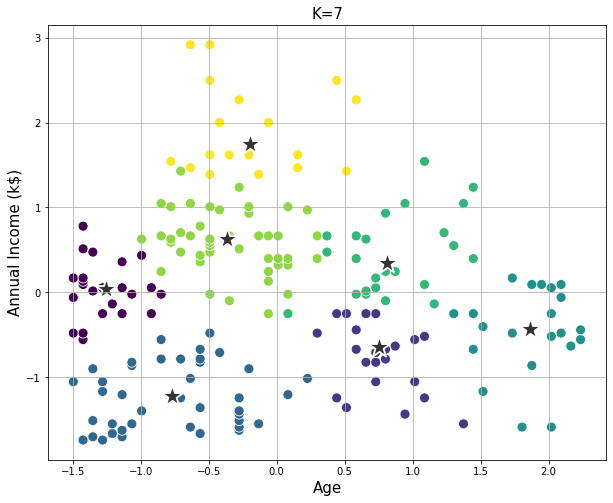

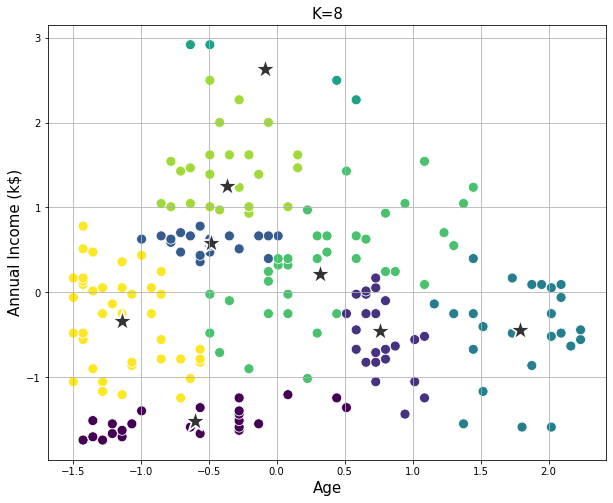

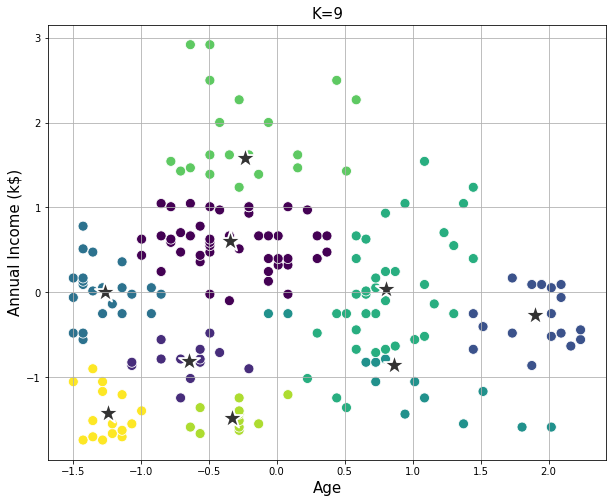

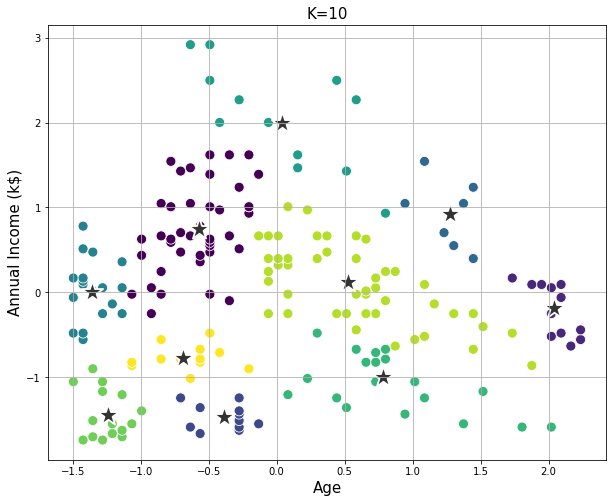

In [16]:
df = []
df.append(data['Age'])
df.append(data['Annual Income (k$)'])
df = np.array(df).transpose()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

k_set = [int(i) for i in range(1, 11)]

for k in k_set:
    gm = GaussianMixture(n_components=k).fit(df_scaled)
    y_pred = gm.predict(df_scaled)

    plt.figure(figsize=[10, 8])
    sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], c=y_pred, s=100)
    centers = gm.means_
    sns.scatterplot(x=centers[:, 0], y=centers[:, 1],
                    color='.2', marker='*', s=500)
    plt.grid()
    plt.title('K='+str(k), fontsize=15)
    plt.xlabel('Age', fontsize=15)
    plt.ylabel('Annual Income (k$)', fontsize=15)
    plt.show()


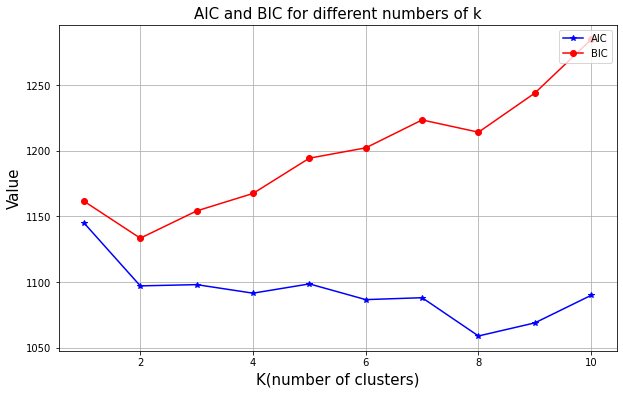

In [17]:
sum_bic = []
sum_aic = []

k_set = range(1, 11)
for k in k_set:
    gm = GaussianMixture(n_components=k).fit(df_scaled)
    sum_bic.append(gm.bic(df_scaled))
    sum_aic.append(gm.aic(df_scaled))

x_axis = np.arange(1, 11)
plt.figure(figsize=[10, 6])
plt.plot(x_axis, sum_aic, 'b-*', label='AIC')
plt.plot(x_axis, sum_bic, 'r-o', label='BIC')
plt.grid()
plt.title('AIC and BIC for different numbers of k', fontsize=15)
plt.xlabel('K(number of clusters)', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.legend(loc='upper right')
plt.show()


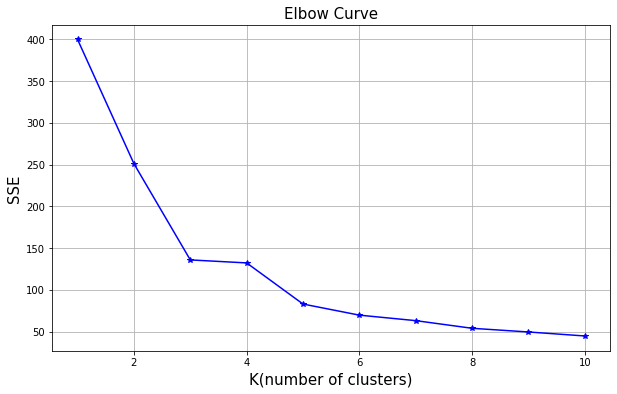

In [18]:
sse = []

k_set = range(1, 11)
for k in k_set:
    gm = GaussianMixture(n_components=k).fit(df_scaled)
    centers = gm.means_
    sse.append(find_inertia(k, centers, df_scaled))

x_axis = np.arange(1, 11)
plt.figure(figsize=[10, 6])
plt.plot(x_axis, sse, 'b-*')
plt.grid()
plt.title('Elbow Curve', fontsize=15)
plt.xlabel('K(number of clusters)', fontsize=15)
plt.ylabel('SSE', fontsize=15)
plt.show()


3 clusters

# Gender and {Annual Income, Spending Score}

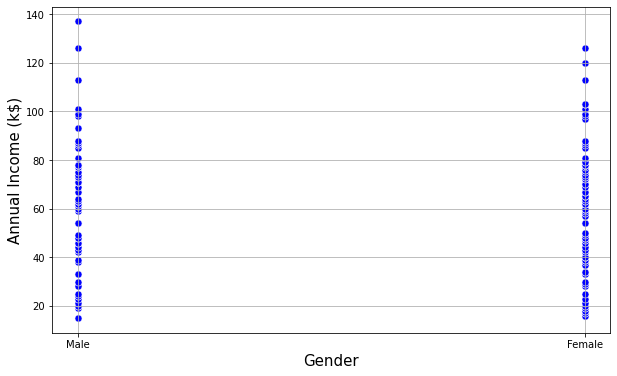

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Gender'],
                y=data['Annual Income (k$)'], color='b', s=50)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Annual Income (k$)', fontsize=15)
plt.grid()


In [20]:
print(np.mean(data[data['Gender'] == 'Male']['Annual Income (k$)']))
print(np.std(data[data['Gender'] == 'Male']['Annual Income (k$)']))


62.22727272727273
26.486586344758496


In [21]:
print(np.mean(data[data['Gender'] == 'Female']['Annual Income (k$)']))
print(np.std(data[data['Gender'] == 'Female']['Annual Income (k$)']))


59.25
25.8955663607278


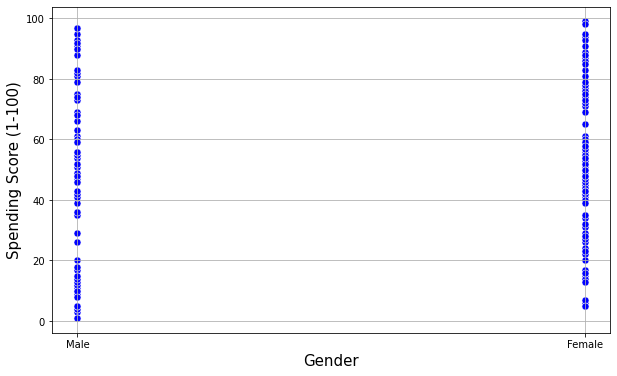

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Gender'],
                y=data['Spending Score (1-100)'], color='b', s=50)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Spending Score (1-100)', fontsize=15)
plt.grid()


In [23]:
print(np.mean(data[data['Gender'] == 'Male']['Spending Score (1-100)']))
print(np.std(data[data['Gender'] == 'Male']['Spending Score (1-100)']))


48.51136363636363
27.737812359739767


In [24]:
print(np.mean(data[data['Gender'] == 'Female']['Spending Score (1-100)']))
print(np.std(data[data['Gender'] == 'Female']['Spending Score (1-100)']))


51.526785714285715
24.00705246880166
